ตัวอย่างจาก : คอร์ส Development
Data Science
Artificial Intelligence
Master Artificial Intelligence 2022 : Build 6 AI Projects - Udemy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2566_1_4613646_AI_and_DS/Datasets/Churn_Modelling.csv")
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
#ลบข้อมูลที่ไม่จำเป็นออกไป
data.drop(['RowNumber', 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)

In [ ]:
# ตรวจสอบค่า null
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# ตรวจสอบชนิดข้อมูล (Object datatypes)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# แปลข้อมูล Category ให้เป็นตัวเลขโดทยใช้เทคนิค Label encode

data_types_dict = dict(data.dtypes)
# Keep track Mappings Column name to LabelEncoders
Label_encoder_collection = {}
for col_name , data_type in data_types_dict.items():
    if data_type == 'object':
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] = Le

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [ ]:
# แยก attribute และ class ออกมาเก็บใน x และ y ตามลำดับ
X = data.iloc[: , :-1].values.astype(np.float32)
Y = data.iloc[: , -1].values.astype(int)

In [ ]:
# แบ่งข้อมูลสำหรับ test ไว้ 20% และ train 80%
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [ ]:
# สร้างโมเดล Neural Network
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(10,)))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# เรียกดู summary ของ neural network model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# กำหนด optimizer ให้กับ model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
# ทำการ train model
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20)

Epoch 1/20
250/250 [==============================] - 2s 3ms/step - loss: 564.3240 - accuracy: 0.6645 - val_loss: 279.4435 - val_accuracy: 0.7135
Epoch 2/20
250/250 [==============================] - 1s 2ms/step - loss: 343.9940 - accuracy: 0.6786 - val_loss: 327.4769 - val_accuracy: 0.5350
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 436.8360 - accuracy: 0.6718 - val_loss: 288.5047 - val_accuracy: 0.7730
Epoch 4/20
250/250 [==============================] - 1s 2ms/step - loss: 365.6704 - accuracy: 0.6760 - val_loss: 128.7326 - val_accuracy: 0.4540
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 444.0772 - accuracy: 0.6725 - val_loss: 655.5133 - val_accuracy: 0.8020
Epoch 6/20
250/250 [==============================] - 0s 1ms/step - loss: 321.7731 - accuracy: 0.6746 - val_loss: 264.3607 - val_accuracy: 0.4955
Epoch 7/20
250/250 [==============================] - 0s 1ms/step - loss: 329.7451 - accuracy: 0.6736 - val_loss: 358.9878 -

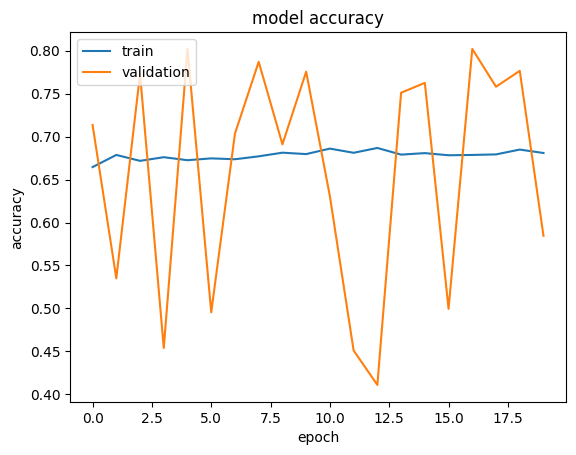

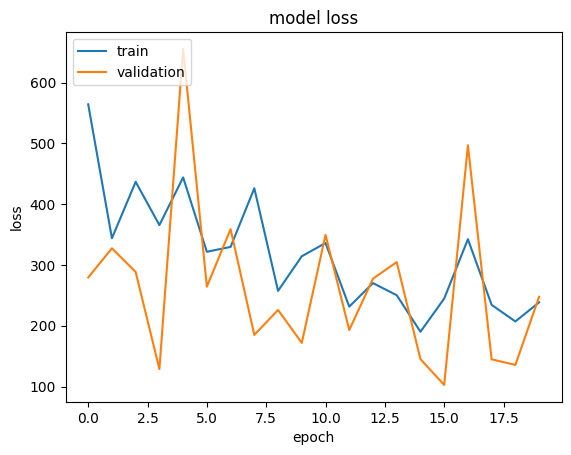

In [ ]:
# แสดงกราฟรการ train

#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# ทำนายค่า
predictions = np.round(model.predict(Xtest))

63/63 [==============================] - 0s 714us/step


In [ ]:
# ตรวจสอบความถูกต้อง
from sklearn.metrics import accuracy_score , confusion_matrix

accuracy_score(Ytest , predictions) # Accuracy Seems good

0.5845

In [ ]:
# แสดง confusion matrix

confusion_matrix(Ytest , predictions)

array([[1050,  554],
       [ 277,  119]])

# <ins>โจทย์</ins> ให้นักศึกษาเพิ่มประสิทธิภาพการทำงานของโมเดลนี้

โดยการปรับเปลี่ยนโมเดล เช่น การเพิ่ม layer หรือ จำนวน node, การใช้ BatchNormalization (ก่อน layer) หรือ Dropout (แทกหลัง layer)

<ins>ตัวอย่าง Dropout</ins>

model.add(tf.keras.layers.Dropout(0.2))


<ins>ตัวอย่าง BatchNormalization</ins>

model.add(tf.keras.layers.BatchNormalization())

In [ ]:
# สร้างโมเดล Neural Network
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.Input(shape=(10,)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(100))
model2.add(tf.keras.layers.Dense(80))
#model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# เรียกดู summary ของ neural network model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dropout_3 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# กำหนด optimizer ให้กับ model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
model2.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
# ทำการ train model
history = model2.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20)

Epoch 1/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4638 - accuracy: 0.7899 - val_loss: 0.4471 - val_accuracy: 0.8010
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.8090 - val_loss: 0.4335 - val_accuracy: 0.8135
Epoch 3/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.8064 - val_loss: 0.4306 - val_accuracy: 0.8170
Epoch 4/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.8055 - val_loss: 0.4326 - val_accuracy: 0.8160
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8040 - val_loss: 0.4334 - val_accuracy: 0.8085
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8086 - val_loss: 0.4319 - val_accuracy: 0.8155
Epoch 7/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.8058 - val_loss: 0.4331 - val_accuracy: 0.8085
Epoch 

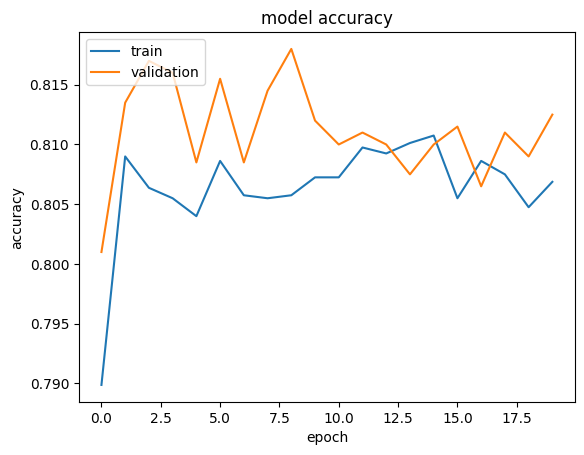

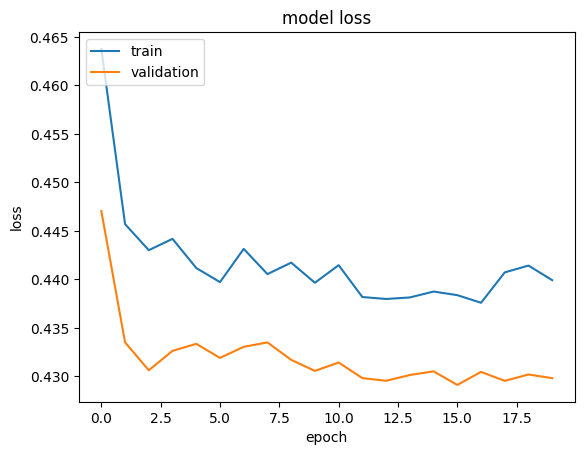

In [ ]:
# แสดงกราฟรการ train

#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# ทำนายค่า
predictions = np.round(model2.predict(Xtest))

63/63 [==============================] - 0s 1ms/step


In [ ]:
# ตรวจสอบความถูกต้อง
from sklearn.metrics import accuracy_score , confusion_matrix

accuracy_score(Ytest , predictions) # Accuracy Seems good

0.812

In [ ]:
# แสดง confusion matrix

confusion_matrix(Ytest , predictions)

array([[1571,   33],
       [ 343,   53]])